¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [62]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# leer conjuntos de datos en los DataFrames
df1= pd.read_csv('/datasets/instacart_orders.csv')
df2= pd.read_csv('/datasets/products.csv')
df3= pd.read_csv('/datasets/aisles.csv')
df4= pd.read_csv('/datasets/departments.csv')
df5= pd.read_csv('/datasets/order_products.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, usaste correctamente una celda independiente para importar las librerías y otra para leer los datos
</div>

In [64]:
# mostrar información del DataFrame
print(df1.head())

  order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
0                        1515936;183418;11;6;13;30.0                              
1                          1690866;163593;5;5;12;9.0                              
2                           1454967;39980;4;5;19;2.0                              
3                         1768857;82516;56;0;20;10.0                              
4                         3007858;196724;2;4;12;17.0                              


In [65]:
# mostrar información del DataFrame
print(df2.head())

      product_id;product_name;aisle_id;department_id
0                 1;Chocolate Sandwich Cookies;61;19
1                          2;All-Seasons Salt;104;13
2        3;Robust Golden Unsweetened Oolong Tea;94;7
3  4;Smart Ones Classic Favorites Mini Rigatoni W...
4                   5;Green Chile Anytime Sauce;5;13


In [66]:
# mostrar información del DataFrame
print(df3.head())

                 aisle_id;aisle
0       1;prepared soups salads
1           2;specialty cheeses
2         3;energy granola bars
3               4;instant foods
4  5;marinades meat preparation


In [67]:
# mostrar información del DataFrame
print(df4.head())

  department_id;department
0                 1;frozen
1                  2;other
2                 3;bakery
3                4;produce
4                5;alcohol


In [68]:
# mostrar información del DataFrame
print(df5.head())

  order_id;product_id;add_to_cart_order;reordered
0                            2141543;11440;17.0;0
1                               567889;1560;1.0;1
2                             2261212;26683;1.0;1
3                              491251;8670;35.0;1
4                              2571142;1940;5.0;1


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Tal y como se puede observar en las primeras 5 filas de cada Dataframe, usando el metodo .head(), el caracter que se usa como separador de los valores en todos los archivos CSV es un ";" tanto para separar las columnas como para separar los valores en las filas.
Por otro lado, en el dataframe 2 que muestra los nombres de los productos, es el único dataframe que al menos en sus primeras 5 filas esta mostrando que tiene strings con mayusculas en la columna con los nombres de los productos. es probable que sea necesario pasar toda esa columna a minuscula para facilitar la posible manipulación de los datos a futuro.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
En primer lugar, especificaré que el separador de todos los dataframes es ';'.
En segundo lugar, modificaré a minusculas la columna de productos del df2 usando 'str.lower()'
y por ultimo revisaré como pandas está interpretando los tipos de datos de cada dataframe usando el atributo .dtypes, para verificar que no hayan incongruencias.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Me gusta tu plan de preprocesamiento de los datos
</div>

In [69]:
print()
print('df1')
print()

df1= pd.read_csv('/datasets/instacart_orders.csv', sep=';')
print(df1.head())
print()
print('El tipo de datos que posee el df1 es:\n', df1.dtypes)

print()
print('df2')
print()

df2= pd.read_csv('/datasets/products.csv',sep= ';')
df2['product_name'] = df2['product_name'].str.lower()
print(df2.head())
print()
print('El tipo de datos que posee el df2 es:\n', df2.dtypes)

print()
print('df3')
print()

df3= pd.read_csv('/datasets/aisles.csv',sep= ';')
print(df3.head())
print()
print('El tipo de datos que posee el df3 es:\n', df3.dtypes)

print()
print('df4')
print()

df4= pd.read_csv('/datasets/departments.csv',sep= ';')
print(df4.head())
print()
print('El tipo de datos que posee el df4 es:\n', df4.dtypes)

print()
print('df5')
print()

df5= pd.read_csv('/datasets/order_products.csv',sep= ';')
print(df5.head())
print()
print('El tipo de datos que posee el df5 es:\n', df5.dtypes)


df1

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  

El tipo de datos que posee el df1 es:
 order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

df2

   product_id                                       product_name  aisle_id  \
0           1                         chocolate sandwich cookies        61 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [70]:
# Revisa si hay pedidos duplicados

print(df1['order_id'].duplicated()) #Esta linea devuelve un booleano que me indica False
#si es la primera vez que aparece un dato, pero muestra True cuando encuentra un valor repetido
print(df1['order_id'].duplicated().sum()) #Esta línea suma el Número total de los duplicados encontrados


0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Name: order_id, Length: 478967, dtype: bool
15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

sí, si hay lineas duplicadas en el df1 (dataframe de instacart_orders.csv)
hay 15 valores que se repiten en todo el dataframe.

In [71]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

df1_wend_2am= df1[(df1['order_dow']== 3) & (df1['order_hour_of_day']== 2)]
# En esta linea aplicamos lo visto en la sección filtrado por condiciones multiples para mostrar
# datos especificos del dataframe usando distintas expresiones de filtrado entre las condiciones
# como: &, ~, |
#adicionalmente se tiene en cuenta el día de la semana: miercoles, que corresponde al 3, ya que el 
#Domingo es 0. y la hora que son las 2am.

print(df1_wend_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Este resultado sugiere que a las 2am del día miercoles se han registrado un total de 121 ordenes de compra. este resultado podría variar ya que no se han eliminado todavía los duplicados.

In [72]:
# Elimina los pedidos duplicados
df1= df1.drop_duplicates(subset='order_id')

In [73]:
# Vuelve a verificar si hay filas duplicadas
print(df1.duplicated().sum())

0


In [74]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df1['order_id'].duplicated().sum())

0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen manejo de los duplicados en esta tabla
</div>

Describe brevemente tus hallazgos y lo que hiciste con ellos

Bueno, despues de realizar el pretratamiento de los datos y filtrar el dataframe usando 2 condiciones simultaneamente pude notar que según el registro de ordenes hay un total de 121 ordenes creadas a las 2 de la mañana los días miercoles; 
Me llama la atención que haya tal cantidad de ordenes registradas, teniendo en cuenta que es mitad de semana y en la madrugada, la verdad me habría esperado un número mucho menor.
sin embargo, no he realizado la comparación de estos resultados con el número de ordenes que se obtendrían otros días como el fin de semana en el mismo horario para confirmar si efectivamente es un número muy grande o todo lo contrario.

luego se contaron y se eliminaron los duplicados del dataframe. 

### `products` data frame

In [75]:
# Verifica si hay filas totalmente duplicadas
print(df2.duplicated().sum()) #df2 es el dataframe creado a partir de-> products.csv

0


In [76]:
# Revisa únicamente si hay ID de productos duplicados
print(df2['product_id'].duplicated().sum())

0


In [77]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(df2['product_name'].duplicated().sum())
df2['product_name'] = df2['product_name'].str.upper()

1361


In [78]:
# Revisa si hay nombres duplicados de productos no faltantes
print('Nombres de producto duplicados (no nulos):', df2[~df2['product_name'].isna()]['product_name'].duplicated().sum())
# Al usar isna() en esta línea de código me permite buscar los valores nulos (o ausentes NaN/None) dentro de la columna product_name
# pero como niego la expresión con '~', lo que realmente obtengo es: los duplicados NO NULOS presentes en la columna product_name.

Nombres de producto duplicados (no nulos): 104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al revisar si habian duplicados en las distintas columnas del dataframe 2 de products.csv, puedo decir que en terminos generales, al inicio, el df2 no encuentra duplicados, y tampoco productos que se hayan registrado más de una vez en el dataframe, sin embargo, al revisar si hay nombres de productos duplicados sí aparecen valores más grandes.

Esto se debe a que en esta columna de datos tenemos una menor cantidad de datos validos (48436 non-null) a diferencia del resto de las columnas (que tienen un total de 49694 non-null cada una), esto se puede saber facilmente al usar el metodo .info() en el df2. 

luego, revisando detenidamente los resultados, para saber cuantos de estos datos faltantes NO correspondian a valores NaN o None, encontramos que los duplicados no nulos equivalen a 104.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, la tabla de productos se ha tratado correctamente
</div>

### `departments` data frame

In [79]:
# Revisa si hay filas totalmente duplicadas
print(df4.duplicated().sum()) #df4 es el dataframe creado a partir de-> deparments.csv

0


In [80]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(df4['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Despues de revisar si en df4 existen lineas duplicadas, pude ver que ni en la revisión general ni en la columna 'department_id' hay lineas duplicadas.

### `aisles` data frame

In [81]:
# Revisa si hay filas totalmente duplicadas
print(df3.duplicated().sum())#df3 es el dataframe creado a partir de-> aisles.csv

0


In [82]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(df3['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Despues de revisar si en df3 existen lineas duplicadas, pude ver que ni en la revisión general ni en la columna 'aisle_id' hay lineas duplicadas.

### `order_products` data frame

In [83]:
# Revisa si hay filas totalmente duplicadas
print(df5.duplicated().sum()) #df5 es el dataframe creado a partir de-> order_products.csv

0


In [84]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print("Valores duplicados en order_id:", df5['order_id'].duplicated().sum())
print("Valores nulos en 'order_id':", df5['order_id'].isna().sum())
print()

print("Valores duplicados en product_id:", df5['product_id'].duplicated().sum())
print("Valores nulos en 'product_id':", df5['product_id'].isna().sum())
print()

print("Valores duplicados en add_to_cart_order:", df5['add_to_cart_order'].duplicated().sum())
print("Valores nulos en 'add_to_cart_order':", df5['add_to_cart_order'].isna().sum())

Valores duplicados en order_id: 4094961
Valores nulos en 'order_id': 0

Valores duplicados en product_id: 4499434
Valores nulos en 'product_id': 0

Valores duplicados en add_to_cart_order: 4544942
Valores nulos en 'add_to_cart_order': 836


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Despues de revisar si el df5 contiene valores duplicados vemos que la columna 'order_id' arroja un valor de 4094961, pero para descartar cualquier error o la presencia de duplicados engañosos como valores ausentes NaN o None vemos que obtenemos un valor de 0. mostrando así, que efectivamente los duplicados encontrados anteriormente corresponden a ordenes repetidas dentro del dataframe.

con la columna product_id sucede exactamente lo mismo que con order_id y por ultimo en la columna add_to_cart_order, a diferencia que en las otras aquí si hay un total de 836 valores nulos (NaN o None) dando a entender que probablemente sean ordenes que no se terminaron de completar y quedó un valor NaN/None en lugar del número que identificara las ordenes agregadas al carrito.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena exploración para corroborar que estas tablas no existan datos duplicados
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [85]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df2['product_name'].isna().sum())

1258


Describe brevemente cuáles son tus hallazgos.

La columna product_name tiene 1258 valores NULOS, es decir, hay 1258 NaN o None en toda la columna

In [86]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
p_faltantes = df2[df2['product_name'].isna()] # Esta línea filtra todos los productos de la columna product_name que sean valores ausentes
print(p_faltantes['aisle_id'].unique()) # Aquí se obtendrá como resultado los pasillos que contengan valores ausentes

[100]


Describe brevemente cuáles son tus hallazgos.

Efectivamente, todos los valores ausentes estan presentes en el pasillo número 100 de víveres

In [87]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(p_faltantes['department_id'].unique())

[21]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, encontraste los duplicados en la tabla de productos
</div>

Describe brevemente cuáles son tus hallazgos

Los resultados muestran que todos los nombres de productos corresponden unicamente al departamento 21 de víveres

In [88]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df2[(df2['aisle_id']== 100) & (df2['department_id']== 21)]) # Aplico el filtro doble para revisar especificamente estas variables

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Al visualizar los datos aplicando ambos filtros se ve como la columna product_name solo muestra valores NaN

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, estos descubrimientos son útiles para comprender la naturaleza de los datos faltantes
</div>

In [89]:
# Completa los nombres de productos ausentes con 'Unknown'
df2['product_name'].fillna('Unknown', inplace= True) # Uso el metodo fillna() con inplace= True para reemplazar los valores ausentes
print(df2[(df2['aisle_id']== 100) & (df2['department_id']== 21)]) #vuelvo a revisar los datos despues del cambio anterior

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Despues de reemplazar los valores ausentes por 'Unknown' volví a revisar la tabla filtrada y efectivamente se modificaron, por lo cual, ya no hay más valores ausentes en el df2

### `orders` data frame

In [90]:
# Encuentra los valores ausentes
print(df1.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [91]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
faltantes_df1= df1[df1['days_since_prior_order'].isna()] # Filtro los valores ausentes de esta columna
no_1er_compra= faltantes_df1[faltantes_df1['order_number']!= 1] #ya que order number identifica de 
# forma unica a cada pedido registrado, debía buscar valores nulos que fueran distintos a la primera compra de cada cliente.
print("Valores ausentes que NO son el primer pedido/ la primera compra:", len(no_1er_compra))

Valores ausentes que NO son el primer pedido/ la primera compra: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

El 0 que se obtuvo significa que NO todos los valores ausentes de days_since_prior_order corresponden al primer pedido del cliente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen comentario sobre la naturaleza de los Nan en dicha columna, no todos los faltantes son un error
</div>

### `order_products` data frame

In [92]:
# Encuentra los valores ausentes
print(df5.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [93]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("El valor mínimo de la columna add_to_cart_order es:", df5['add_to_cart_order'].min())
print("El valor máximo de la columna add_to_cart_order es:", df5['add_to_cart_order'].max())

El valor mínimo de la columna add_to_cart_order es: 1.0
El valor máximo de la columna add_to_cart_order es: 64.0


Describe brevemente cuáles son tus hallazgos.
Estos resultados lo que muestran es que de la columna add_to_cart_order hubo al menos 1 pedido que llegó a agregar hasta 64 artículos en una sola orden. y que la menor cantidad agregada en una orden de compra fue de 1

In [94]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
val_ausentes_df5 = df5.loc[df5['add_to_cart_order'].isna(), 'order_id'] 
#La ultima parte del codigo, (antes de la ",") crea una serie que marca True donde hay valores ausentes NaN o None
#y al aplicar .loc[] puedo filtrar las filas con NaN en esa columna especificamente, mientras selecciono los datos de la columna 'order_id'
print(val_ausentes_df5)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [95]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

nan_orders= df5[df5['add_to_cart_order'].isna()] #Primero filtro el df5 teniendo en cuenta los valores ausentes de la columna 'add_to_cart_order'
product_count= nan_orders.groupby('order_id')['product_id'].count() # luego, a partir del df5 filtrado, agrupo el dataframe por el 'order_id' y enseguida cuento el número de productos en cada pedido con la columna 'product_id'
min_product_count= product_count.min() # busco cúal es el valor mínimo encontrado en el conteo anterior

print(min_product_count)

1


Describe brevemente cuáles son tus hallazgos.

Según los resultados, es valido afirmar que no todos los pedidos con valores ausentes tienen más de 64 pedidos, ya que el valor mínimo encontrado en el número de productos por pedido fue 1.

In [96]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df5['add_to_cart_order'].fillna(999, inplace= True) #Del mismo modo que se hizo anteriormente, uso el método fillna() para modificar el dataframe y reemplazar los valores nulos por 
df5['add_to_cart_order']= df5['add_to_cart_order'].astype('int') # Aquí con el metodo astype() modifico el tipo de dato de la columna a integer
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos

Los valores nulos fueron correctamente eliminados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen tratamiento de los datos
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

En este preprocesamiento de los datos se revisaron detenidamente los distintos dataframes creados a partir de los archivos csv. Luego, estos dataframes se limpiaron correctamente eliminando los duplicados, y modificando los valores nulos (NaN y None) para colocar en su lugar o un string 'Unknown' o un número (int) 999.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [97]:
invalid_hours= df1[(df1['order_hour_of_day'] < 0) | (df1['order_hour_of_day'] > 23)]
print("Registros con horas inválidas:", invalid_hours)

Registros con horas inválidas: Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [98]:
invalid_days= df1[(df1['order_dow'] < 0) | (df1['order_dow'] > 6)]
print("Registros con días inválidos:", invalid_days)

Registros con días inválidos: Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, validaste que la columna de horas tenga solo las 24 horas del día y que los datos tengan los 7 días de la semana. En las horas también se podría aplicar un unique para visualizar la cantidad de datos de horas que contiene.
</div>

Escribe aquí tus conclusiones

los filtros aplicados sobre las columnas 'order_dow' y 'order_hour_of_day' muestran que en ambos casos no hay valores que sean distintos a los esperados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones, gracias por resumir los resultados de todo lo que se va realizando. No solo el código es importante. También lo es comentar y describir el trabajo realizado
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

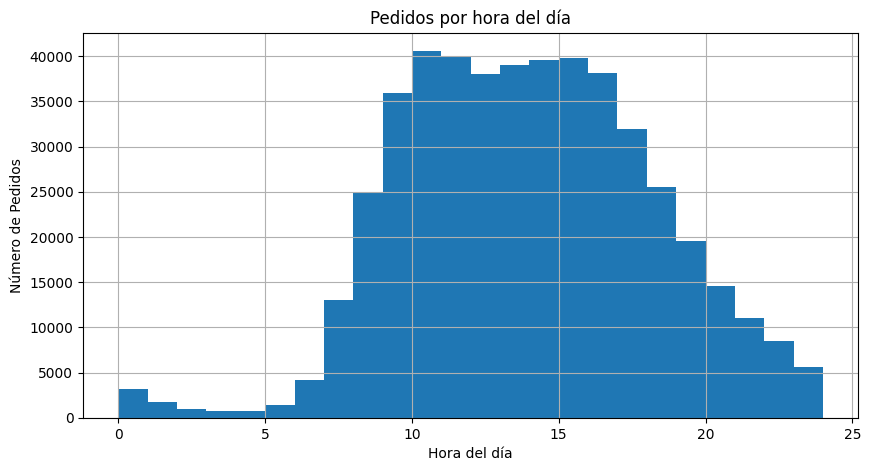

In [99]:
import matplotlib.pyplot as plt
df1['order_hour_of_day'].plot(
    kind= 'hist',
    title= 'Pedidos por hora del día',
    bins= 24,
    range= (0, 24),
    figsize= (10, 5),
    grid= True
)
plt.xlabel('Hora del día')
plt.ylabel('Número de Pedidos')
plt.show()

Escribe aquí tus conclusiones

El histograma muestra que hay una variación significativa entre las horas iniciales del día,  ya que, (de madrugada) entre las 0:00am y las 5:00am los pedidos registrados son en general los valores más pequeños del día, y conforme van pasando las horas, progresivamente se realiza mayor cantidad de compras entre las 10:00h de la mañana y las 15:00h, luego nuevamente comienzan a disminuir la cantidad de pedidos que realizan los clientes. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena gráfica de la distribución de las horas del día
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

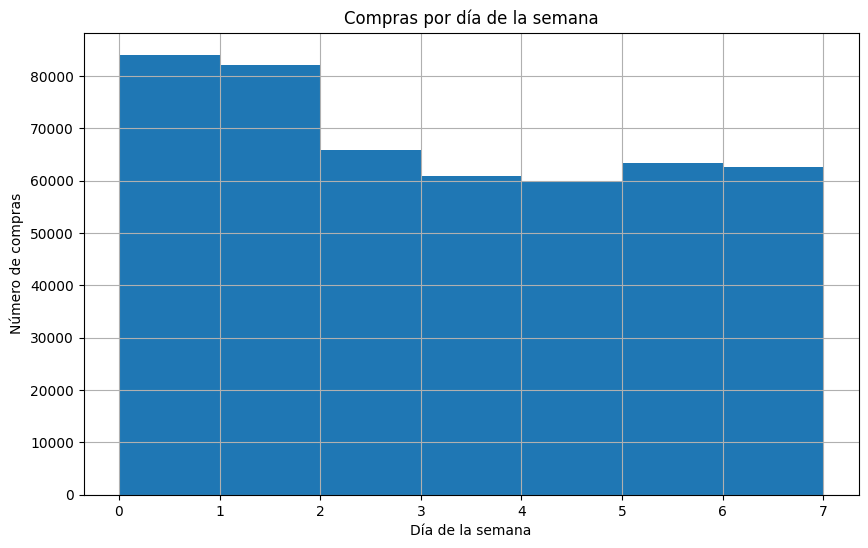

In [100]:
import matplotlib.pyplot as plt
df1['order_dow'].plot(
    kind= 'hist',
    title= 'Compras por día de la semana',
    bins= 7,
    range= (0, 7),
    figsize= (10, 6),
    grid= True
)
plt.xlabel('Día de la semana')
plt.ylabel('Número de compras')
plt.show()

Escribe aquí tus conclusiones

El gráfico muestra que los días de la semana en los que se registran mayor cantidad de ventas fueron domingo y lunes alcanzando valores por encima de los 80.000 pedidos, luego, durante los siguientes días de la semana los valores son relativamente similares ya que entre el Martes y el Sabado las compras realizadas se mantienen entre los 60.000 y los 65.000 pedidos. siendo el jueves el día con menor cantidad de compras (60.000) y el domingo el día con el valor más alto (por encima de los 83.000).

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, se puede apreciar la distribución en los días de la semana
</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

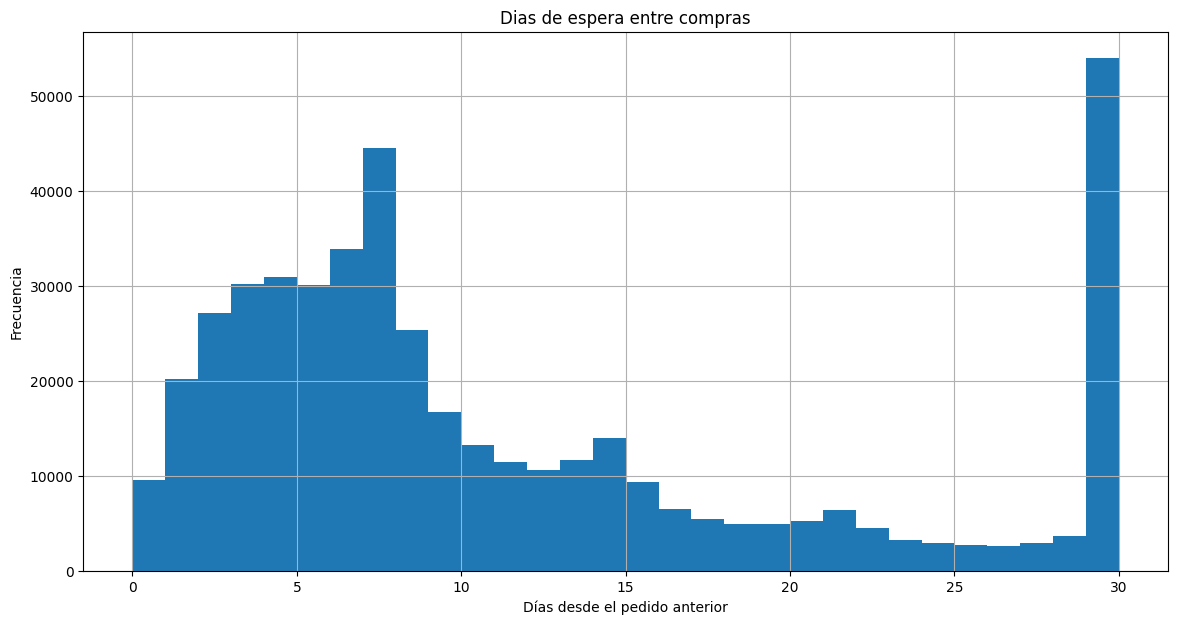

El tiempo de espera mínimo entre pedidos es: 0.0
El tiempo de espera máximo entre pedidos es: 30.0


In [101]:
tiempo_de_espera= df1['days_since_prior_order'].dropna() # Aquí elimino todos los valores NULOS. (NaN/None)
tiempo_de_espera.plot(
    kind= 'hist',
    bins= 30,
    figsize=(14,7),
    range=(0, 30),
    title= 'Dias de espera entre compras',
    grid= True
)
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Frecuencia')

plt.show()
print("El tiempo de espera mínimo entre pedidos es:", tiempo_de_espera.min())
print("El tiempo de espera máximo entre pedidos es:", tiempo_de_espera.max())

Escribe aquí tus conclusiones

Este gráfico muestra que hay un patrón en el comportamiento de los clientes, ya que nos indica que hay una gran cantidad de clientes que realizan compras en 2 momentos puntuales del mes, el primero cada 7 días y el siguiente y más grande grupo de clientes cada 30 días.

Por otro lado, también muestra que hay muchos clientes (la gran mayoría que se agrupan al lado izquierdo del gráfico) que suelen crear nuevos pedidos por tarde cada 8-10 días.

y al evaluar los valores mínimo y máximo vemos que encaja perfectamente con lo observado ya que muestra como valor mínimo el número 0. es decir, hay un porcentaje de clientes que compran todos los días del mes, mientras que hay otro porcentaje que realiza una sola compra cada 30 días.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, se puede visualizar correctamente cuanto tardan las personas en hacer otro pedido, el valor máximo es muy elevado para ser real, lo más seguro es que los datos estén limitados y todos los valores mayores a 30 se agrupen en 30
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

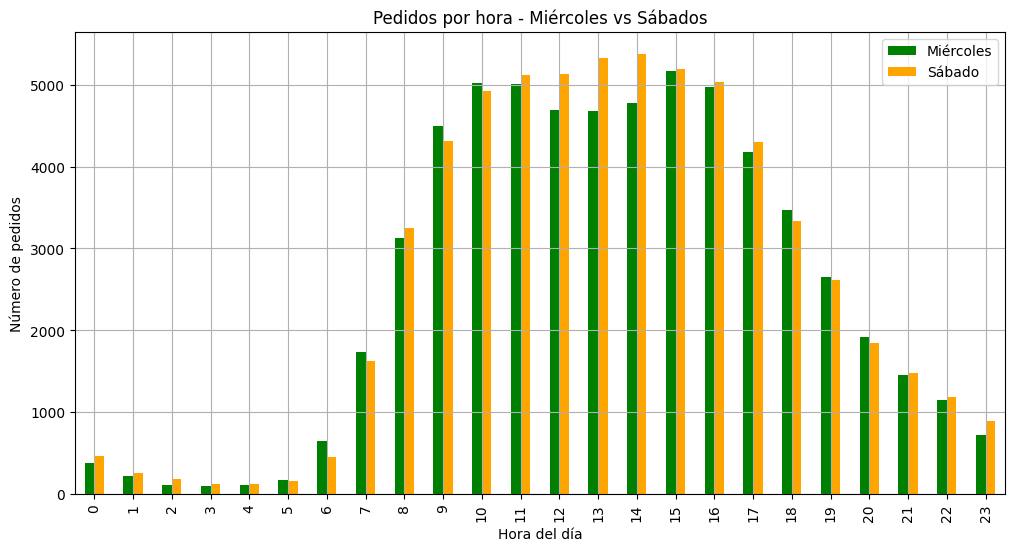

In [102]:
miercoles= df1[df1['order_dow']==3] #Primero filtro los días, tanto el Miércoles como el Sábado
sabado= df1[df1['order_dow']==6]
#Luego, con estos días filtrados busco en el dataframe la columna 'order_hour_of_day' para realizar 
# el conteo de cada valor único para el Miércoles y el Sábado y .sort_index() organiza estos valores en orden
conteo_miercoles= miercoles['order_hour_of_day'].value_counts().sort_index()
conteo_sabado= sabado['order_hour_of_day'].value_counts().sort_index()

# Ahora creo un diccionario que se convertirá en mi nuevo dataframe para crear el gráfico que busco
nuevo_df = pd.DataFrame({
    'Miercoles': conteo_miercoles,
    'Sabado': conteo_sabado
})

#finalmente, uso el nuevo_df para crear el gráfico
nuevo_df.plot(
    kind= 'bar',
    figsize= (12,6),
    color=['green', 'orange'],
    title= 'Pedidos por hora - Miércoles vs Sábados',
    xlabel= 'Hora del día',
    ylabel= 'Número de pedidos',
    grid= True
)
plt.legend(['Miércoles', 'Sábado'])
plt.show()

Escribe aquí tus conclusiones

Al revisar detenidamente el gráfico que compara la cantidad e pedidos que se realizan el Miércoles y el Sábado, se puede decir que en general el comportamiento de compra es muy similar en ambos días, sin embargo, en general el día Sábado suele estar por encima del Miércoles especialmente en las horas pico (entre las 11:00h y las 15:00h) y se mantiene de esta manera, el la mayor parte del tiempó. hay ciertas horas del día en donde el miercoles supera por poco la cantidad de pedidos realizados por los clientes, como a las 6:00h, 7:00h, 9:00h, 10:00h y luego en la tarde, desde las  18:00h hasta las 20:00h 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen histograma para comprender la diferencia entre las ordenes que se piden en cada día
</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [103]:
# En primer lugar debo agrupar el Dataframe por cliente, es decir por 'user_id', 
# luego de que ya está agrupado voy a contar los valores unicos que hay en la columna de ordenes 'order_id' 
# de modo que se sepa cuantos clientes hacen respectivamente cuantas compras.

pedidos_por_cliente = df1.groupby('user_id')['order_id'].nunique()
print(pedidos_por_cliente )

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64


El mayor número de pedidos hecho por un cliente es: 28
El menor número de pedidos hecho por un cliente es: 1


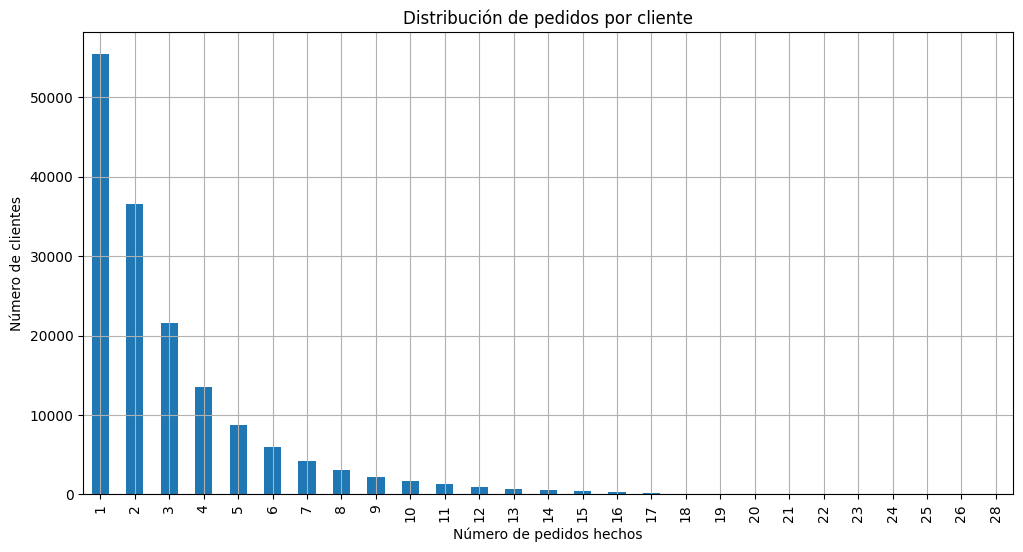

In [104]:
#Pero como se puede ver estos datos están en desorden, razón por la cual debo organizarlos y contarlos.
distribucion= pedidos_por_cliente.value_counts().sort_index()
# para saber los limites que debe tener el eje x del gráfico puedo hacer uso del valor máximo y mínimo de la variable anterior 'pedidos_por_cliente'
print("El mayor número de pedidos hecho por un cliente es:", pedidos_por_cliente.max())
print("El menor número de pedidos hecho por un cliente es:", pedidos_por_cliente.min())

distribucion.plot(
    kind= 'bar',
    figsize= (12,6),
    xlim= (0,28),
    title= 'Distribución de pedidos por cliente',
    xlabel= 'Número de pedidos hechos',
    ylabel= 'Número de clientes',
    grid= True
)

plt.show()

Escribe aquí tus conclusiones

Esta gráfica lo que muestra es que la gran mayoría de clientes (más de 50.000) solamente han hecho una sola compra y progresivamente se ve como la cantidad de personas disminuye cuando se trata de repetir ordenes o crear nuevos pedidos, hasta que visualmente practicamente desaparece la barra en el número 28. lo que corresponde a que el número de clientes que han repetido sus compras 28 veces es muy muy pequeño.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, con esta información se puede visualizar correctamente la distribución del número de pedidos por cliente
</div>

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [105]:
# para esta gráfica necesito combinar el df2 que es el que contiene la información del archivo products.csv
# y el df5 que contiene la información del archivo order_products.csv por la columna que tiene los datos en común
# que es 'product_id' usando 'inner' ya que esto me permite obtener los productos que realmente han sido pedidos por los clientes.

prod_pedidos= pd.merge(df5, df2, on= 'product_id', how= 'inner')

#Ahora debo contar la frecuencia con la que se solicita cada producto en el nuevo dataframe combinado.
top_prod = prod_pedidos['product_id'].value_counts().reset_index()

print(top_prod)

       index  product_id
0      24852       66050
1      13176       53297
2      21137       37039
3      21903       33971
4      47209       29773
...      ...         ...
45568  10543           1
45569   5222           1
45570   2347           1
45571  11893           1
45572  32074           1

[45573 rows x 2 columns]


In [106]:
# ya que 'top_prod' posee solo estas dos columnas, debo renombrar cada una de modo que se entienda mejor 
# a que corresponden cada una
top_prod.columns = ['product_id', 'total_pedidos']

# Luego, puedo volver a unir el df2 a mi dataframe 'top_prod', por medio de la columna 'product_id'
# pero esta vez para mostrar el nombre del producto y así identificar más facilmente cuales son
# los 20 productos más solicitados.

top_prod= pd.merge(top_prod, df2, on='product_id')

# Ahora si puedo mostrar las 3 columnas.
top_20= top_prod.head(20)[['product_id', 'product_name', 'total_pedidos']]
print(top_20)

    product_id              product_name  total_pedidos
0        24852                    BANANA          66050
1        13176    BAG OF ORGANIC BANANAS          53297
2        21137      ORGANIC STRAWBERRIES          37039
3        21903      ORGANIC BABY SPINACH          33971
4        47209      ORGANIC HASS AVOCADO          29773
5        47766           ORGANIC AVOCADO          24689
6        47626               LARGE LEMON          21495
7        16797              STRAWBERRIES          20018
8        26209                     LIMES          19690
9        27845        ORGANIC WHOLE MILK          19600
10       27966       ORGANIC RASPBERRIES          19197
11       22935      ORGANIC YELLOW ONION          15898
12       24964            ORGANIC GARLIC          15292
13       45007          ORGANIC ZUCCHINI          14584
14       39275       ORGANIC BLUEBERRIES          13879
15       49683            CUCUMBER KIRBY          13675
16       28204        ORGANIC FUJI APPLE        

Escribe aquí tus conclusiones

Los productos más solicitados por los clientes son principalmente frutas y verduras. en especial las Bananas que según los datos han llegado a ser solicitadas hasta en 66.050 pedidos 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Se obtuvo correctamente este top 20, te recomendaría una gráfica de barras para comparar mejor el volumen en cada uno de los productos obtenidos
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [107]:
# 1ro voy a calcular el número de artículos por pedido
items_por_pedido = df5.groupby('order_id')['product_id'].count()

# Podría hacer uso del método .describe() para ver en la tabla resultante como se distribuyen los valores que acabo de agrupar
print("Descripción de los artículos por pedido:")
print(items_por_pedido.describe())

Descripción de los artículos por pedido:
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


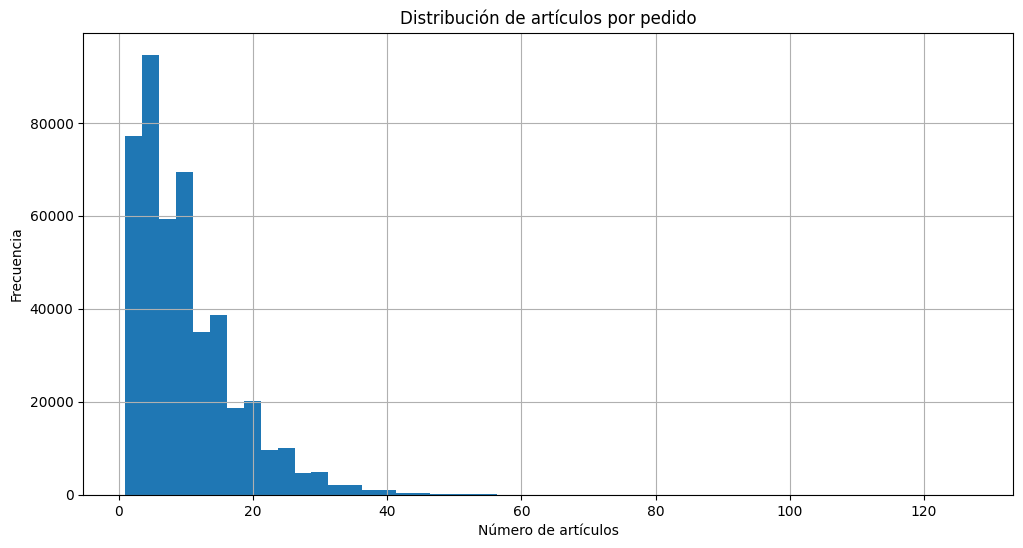

In [108]:
#Creo un histograma para visualizar mejor la distribución de los datos
items_por_pedido.plot(
    kind= 'hist',
    bins= 50,
    figsize=(12,6),
    title= 'Distribución de artículos por pedido',
    grid= True
)
plt.xlabel('Número de artículos')
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones

Según los datos que muestra el método .describe() la media del número de artículos que se solicitan por cada pedido equivale a 10.09 artículos. es decir, pueden haber muchos pedidos que soliciten más o menos que eso, pero la gran mayoría de los clientes suele llevar esa cantidad.
adicionalmente, hay casos excepcionales como el cliente que alcanzó el valor máximo, mostrando que hubo alguien que llegó a agregar hasta 127 artículos en una sola compra.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, este count se realizó correctamente
</div>

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [109]:
#Aplico un filtro en df5 para encontrar los productos reordenados
prod_reord = df5[df5['reordered']==1]
print(prod_reord)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
5         2456893       21616                  4          1
...           ...         ...                ...        ...
4544999   1622300       24852                  1          1
4545000   1125324       40600                  6          1
4545002    577211       15290                 12          1
4545004    692640       47766                  4          1
4545005    319435         691                  8          1

[2683838 rows x 4 columns]


In [110]:
# Ahora debo contar los 20 productos más reordenados
top_reordenados = prod_reord['product_id'].value_counts().reset_index().head(20)
print(top_reordenados)

    index  product_id
0   24852       55763
1   13176       44450
2   21137       28639
3   21903       26233
4   47209       23629
5   47766       18743
6   27845       16251
7   47626       15044
8   27966       14748
9   16797       13945
10  26209       13327
11  22935       11145
12  24964       10411
13  45007       10076
14  49683        9538
15  28204        8989
16   8277        8836
17  39275        8799
18   5876        8412
19  49235        8389


In [111]:
# Modifico los nombres de las columnas para posteriormente poder mezclar este dataframe con df2 y obtener el nombre al que corresponde cada product_id
top_reordenados.columns = ['product_id', 'reorder_count']

# Agrego los nombres de los productos usando df2
top_reordenados = top_reordenados.merge(df2, on='product_id')

#Imprimo los 20 productos más reordenados con su id y el número de veces que fue reordenado.
print(top_reordenados[['product_id', 'product_name', 'reorder_count']])

    product_id              product_name  reorder_count
0        24852                    BANANA          55763
1        13176    BAG OF ORGANIC BANANAS          44450
2        21137      ORGANIC STRAWBERRIES          28639
3        21903      ORGANIC BABY SPINACH          26233
4        47209      ORGANIC HASS AVOCADO          23629
5        47766           ORGANIC AVOCADO          18743
6        27845        ORGANIC WHOLE MILK          16251
7        47626               LARGE LEMON          15044
8        27966       ORGANIC RASPBERRIES          14748
9        16797              STRAWBERRIES          13945
10       26209                     LIMES          13327
11       22935      ORGANIC YELLOW ONION          11145
12       24964            ORGANIC GARLIC          10411
13       45007          ORGANIC ZUCCHINI          10076
14       49683            CUCUMBER KIRBY           9538
15       28204        ORGANIC FUJI APPLE           8989
16        8277  APPLE HONEYCRISP ORGANIC        

Escribe aquí tus conclusiones

Los resultados muestran que la gran mayoría de clientes suelen reordenar productos orgánicos como fruta y verduras principalmente Bananas

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Aplicaste correctamente el group by sobre el reordered para obtener estos conteos, excelente
</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [112]:
# 1. Calculo el total de pedidos por producto y luego renombro la columna usando un dicionario
total_pedidos = df5.groupby('product_id')['reordered'].count().reset_index()
total_pedidos = total_pedidos.rename(columns={'reordered': 'total_pedidos'})

# 2. Calculo los re-pedidos por producto y luego renombro la columna usando un dicionario
reordenados_count = df5[df5['reordered'] == 1].groupby('product_id')['reordered'].count().reset_index()
reordenados_count = reordenados_count.rename(columns={'reordered': 'reordenados_count'})

In [113]:
# Calculo directamente usando.agg() ya que este método me permite calcular diferentes estadísticas para diferentes columnas de un dataframe.
tasa_reorden = (df5.groupby('product_id').agg(
        total_pedidos=('reordered', 'count'),
        reordenados_count=('reordered', 'sum')
    ).reset_index())

#Combino el dataframe tasa_reorden con las columnas que necesito de df2.
tasa_reorden= tasa_reorden.merge(df2[['product_id', 'product_name']], on='product_id')

In [114]:
# Calculo la tasa creando una nueva columna en el dataframe 'tasa_reorden' de modo que almacene cada dato calculado
tasa_reorden['tasa_reorden'] = tasa_reorden['reordenados_count'] / tasa_reorden['total_pedidos']

# Imprimo los primeros 20 resultados con ascending = False porque estoy ordenando los productos por su tasa de reorden de mayor a menor.
print(tasa_reorden[['product_id', 'product_name', 'tasa_reorden']].sort_values('tasa_reorden', ascending=False)
      .head(20))

       product_id                                       product_name  \
13453       14721                            BONE STRENGTH TAKE CARE   
19195       20949                           VANILLA SANDWICH COOKIES   
6136         6723                                   PALMIERS- PETITE   
6144         6732                  NATURALLY SPARKLING MINERAL WATER   
41319       45088  CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & ...   
41310       45078                                       POMEGRANATEA   
19258       21016       PARCHMENT LINED 8 IN X 3.75 IN X 2.5 IN PANS   
19248       21005                        PEANUT BUTTER PIE ICE CREAM   
32273       35192                         CHOCOLATE SOY MILK SINGLES   
32277       35197  MOCHA CHOCOLATE CHIP  ORGANIC NON-DAIRY FROZEN...   
6211         6810                        RASPBERRY GOJI PALEO PRINTS   
41274       45040                                 HEAD LOCK MEGA GEL   
41269       45035                               COFFEE FLAVOR YO

Escribe aquí tus conclusiones

Teniendo en cuenta que estos productos los he organizado por su tasa de reorden, es valido afirmar que todos estos primeros 20 productos, son productos de consumo recurrente, y los clientes los recompran de una forma bastante estable y predecible.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, esta proporción se ha calculado correctamente 
</div>

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [115]:
# Combino los datos de df1 con el df5 (usuarios con productos)
pedidos_usuarios = pd.merge(df1[['order_id', 'user_id']], df5, on='order_id')

# Calculo la tasa por usuario
tasa_usuario = pedidos_usuarios.groupby('user_id').agg(
    total_productos=('reordered', 'count'),
    reordenados=('reordered', 'sum')
).reset_index()
#creo una columna que almacenará los datos del calculo de la tasa
tasa_usuario['tasa_reorden'] = tasa_usuario['reordenados'] / tasa_usuario['total_productos']
print(tasa_usuario)
print()
print(tasa_usuario['tasa_reorden'].describe())

        user_id  total_productos  reordenados  tasa_reorden
0             2               26            1      0.038462
1             4                2            0      0.000000
2             5               12            8      0.666667
3             6                4            0      0.000000
4             7               14           13      0.928571
...         ...              ...          ...           ...
149621   206203               27            6      0.222222
149622   206206               21           15      0.714286
149623   206207               46           41      0.891304
149624   206208              125           87      0.696000
149625   206209               25            8      0.320000

[149626 rows x 4 columns]

count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
max           1.000000
Name: tasa_reorden, dtype: float64


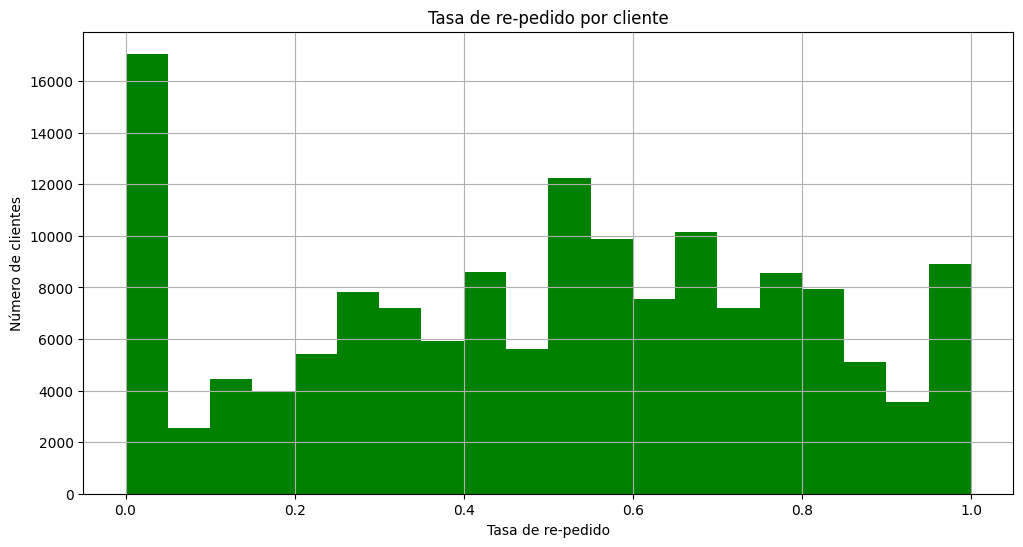

In [116]:
# Histograma de distribución
tasa_usuario['tasa_reorden'].plot(
    kind= 'hist',
    bins= 20,
    figsize=(12, 6),
    color= 'green',
    title= 'Tasa de re-pedido por cliente',
    grid= True   
)

plt.xlabel('Tasa de re-pedido')
plt.ylabel('Número de clientes')
plt.show()

Escribe aquí tus conclusiones

El gráfico y los datos que arroja el método .describe() muestran que la gran mayoría de clientes (hasta más de 16.000) no suele realizar recompras por lo cual la tasa de re-pedido es 0. por eso obtenemos el pico más alto de los datos sobre el lado izquierdo del gráfico. 
En cualquier caso, el promedio de los datos da un valor de 0.49 sobre 1, es decir, que la gran mayoría de clientes su comportamiento indica que la mitad de sus productos son reordenados y la otra mitad son productos nuevos. 
Y por ultimo, los clientes que llegan a tener una tasa de recompra de 1 que son más de 9.000, muestra que este grupo de clientes solo compran productos que ya han pedido antes, son los clientes más predecibles y que no suelen experimentar con nuevos productos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Los calculos son correctos, excelentes comentarios
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [117]:
# 1ro creo un filtro para que me muestre los productos que son añadidos primero (posición 1)
primeros_prod_añadidos = df5[df5['add_to_cart_order'] == 1]

# luego, debo contar la frecuencia
top_primeros = primeros_prod_añadidos['product_id'].value_counts().reset_index().head(20)
# cambio el nombre a las columnas
top_primeros.columns = ['product_id', 'num_veces_añadido_primero']
print(top_primeros)

    product_id  num_veces_añadido_primero
0        24852                      15562
1        13176                      11026
2        27845                       4363
3        21137                       3946
4        47209                       3390
5        21903                       3336
6        47766                       3044
7        19660                       2336
8        16797                       2308
9        27966                       2024
10       44632                       1914
11       49235                       1797
12       47626                       1737
13         196                       1733
14       38689                       1397
15       26209                       1370
16       12341                       1340
17        5785                       1310
18       27086                       1309
19       22935                       1246


In [118]:
# Uno este nuevo dataframe (top_primeros) con df2 para agregar los nombres de los productos al dataframe.
top_primeros = top_primeros.merge(df2, on='product_id')

# Muestro los resultados de las columnas que necesito
print(top_primeros[['product_id', 'product_name', 'num_veces_añadido_primero']])

    product_id                 product_name  num_veces_añadido_primero
0        24852                       BANANA                      15562
1        13176       BAG OF ORGANIC BANANAS                      11026
2        27845           ORGANIC WHOLE MILK                       4363
3        21137         ORGANIC STRAWBERRIES                       3946
4        47209         ORGANIC HASS AVOCADO                       3390
5        21903         ORGANIC BABY SPINACH                       3336
6        47766              ORGANIC AVOCADO                       3044
7        19660                 SPRING WATER                       2336
8        16797                 STRAWBERRIES                       2308
9        27966          ORGANIC RASPBERRIES                       2024
10       44632   SPARKLING WATER GRAPEFRUIT                       1914
11       49235          ORGANIC HALF & HALF                       1797
12       47626                  LARGE LEMON                       1737
13    

Escribe aquí tus conclusiones

Los productos que la gente en general suele colocar dentro del carrito de compras son los productos de primera necesidad, y que suelen reponerse bastante seguido teniendo en cuenta los resultados anteriores, es decir, productos como Bananas, leche, fresas, aguacate, espinaca, agua y demás hacen parte del grupo de verduras o frutas que la gente más suele consumir

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien este top es correcto
</div>

### Conclusion general del proyecto:


A lo largo de este análisis completo de los datos de Instacart, he podido identificar varios patrones de comportamiento de los clientes y características importantes de los productos más solicitados. 

Estos son los hallazgos más relevantes que he obtenido:

1. **Calidad de los datos:**
   - En todos los archivos CSV, el separador utilizado fue el punto y coma (;), lo que facilitó la carga correcta de los datos.
   - En el dataframe de productos (df2), detecté que los nombres de productos tenían mayúsculas y aproximadamente 1,258 valores ausentes, todos asociados al pasillo 100 y departamento 21. Estos valores nulos fueron reemplazados por 'Unknown' para mantener la integridad de los datos.

2. **Duplicados y valores atípicos:**
   - En el dataframe de órdenes (df1) encontré 15 registros duplicados que fueron eliminados.
   - En el dataframe de productos pedidos (df5), identificé valores nulos en la columna 'add_to_cart_order' (836 registros) que correspondían a pedidos con un solo artículo, los cuales fueron eliminados.

3. **Patrones de compra por tiempo:**
   - Las horas con mayor actividad de compra son entre las 10:00 y 15:00 horas, mientras que en la madrugada (0:00-5:00) se registra la menor cantidad de pedidos.
   - Los domingos y lunes son los días con mayor volumen de pedidos (más de 80,000), mientras que el jueves es el día con menor actividad (alrededor de 60,000 pedidos).
   - La mayoría de clientes realiza nuevos pedidos cada 7-10 días, con grupos significativos que compran cada 7 días o cada 30 días.

4. **Comparación entre miércoles y sábados:**
   - Los sábados tienen mayor volumen de pedidos que los miércoles, especialmente en horas pico (11:00-15:00).
   - Los miércoles superan ligeramente a los sábados en horarios específicos como las 6:00-7:00, 9:00-10:00 y 18:00-20:00 horas.

5. **Comportamiento de los clientes:**
   - La gran mayoría de clientes (más de 50,000) ha realizado solo un pedido, disminuyendo drásticamente este número a medida que aumenta la cantidad de pedidos por cliente.
   - Identifiqué tres grupos claros de clientes:
     - **Exploradores (+16,000):** Tasa de re-pedido 0 (solo compran productos nuevos)
     - **Equilibrados (+12,000):** Tasa de re-pedido 0.5 (la mitad de sus productos son nuevos, y la otra mitad reordenados)
     - **Rutinarios (+9,000):** Tasa de re-pedido 1 (solo compran productos conocidos)
   - El promedio global de tasa de re-pedido es 0.49, lo que indica que casi la mitad de los productos comprados son reordenaciones.

6. **Productos más relevantes:**
   - Las frutas y verduras (especialmente bananas) son los productos más solicitados, liderando también en re-pedidos.
   - Los productos con mayor tasa de re-pedido (cercana a 1) son bienes de primera necesidad y consumo recurrente.
   - Los productos que los clientes añaden primero al carrito son principalmente artículos esenciales como bananas, leche, fresas y aguacates.
<!--  -->
7. **Estadísticas clave:**
   - En promedio, los clientes agregan 10.09 artículos por pedido.
   - El pedido más grande registrado contenía 127 artículos.
   - Hay casos excepcionales de clientes que realizan pedidos diarios (tasa mínima 0 días entre pedidos) y otros que compran solo mensualmente (30 días entre pedidos).

**Reflexión final:**
Este análisis me ha permitido entender mejor los patrones de compra en Instacart. Los clientes muestran comportamientos claramente diferenciados que podrían aprovecharse para incrementar sus ventas por medio de estrategias de marketing personalizadas. La predominancia de productos frescos y orgánicos en los top 20 sugiere que estos son clave para la retención de clientes. Además, de que los picos de actividad en domingos/lunes en los horarios diurnos indican momentos críticos para garantizar disponibilidad de productos y capacidad operativa.

Los hallazgos obtenidos proporcionan una base sólida para tomar decisiones sobre la gestión del inventario, promociones personalizadas y optimización de recursos en horarios y días de alta demanda.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones, basadas en lo realizado a lo largo de todo el proyecto
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Sergio

Te quiero felicitar por tu proyecto, está bastante completo y bien realizado. Me gustó especialmente el tratamiento y limpieza de los datos, lo realizaste muy bien y bastante completo.

Te deseo mucho éxito en los siguientes sprints.

Saludos, Marcos
</div>